# Linear Variational Method
[Prof. Jay Foley, University of North Carolina Charlotte](https://foleylab.github.io/)

#### Objectives
- To demonstrate the use of the Linear Variational Method to the model system of the particle in a box with a delta potential
- To illustrate the impact of basis set size on the variational energy

#### Learning Outcomes
By the end of this workbook, students should be able to
- Implement expressions for Hamiltonian matrix elements of the particle in a box with a delta function potential into simple python code
- Express a linear expansion of basis functions as a numpy array
- Utilize numpy's matrix-vector operations to compute energy expectation values of different trial wavefunctions
- Utilize numpy's `linalg.eigh` function to obtain eigenvalues and eigenvectors of a Hamiltonian matrix
- Plot the variational ground-state wavefunction using `pyplot`


#### Summary
We will apply the Linear Variational Method to the particle in a box of length $10$ atomic units 
with a delta function potential centered at $x=5$ atomic units. We will plot the delta function potential 
in the next cell using the python library `matplotlib` and the special function from the `scipy` library called
`signal.unit_impulse` that can create a delta function.




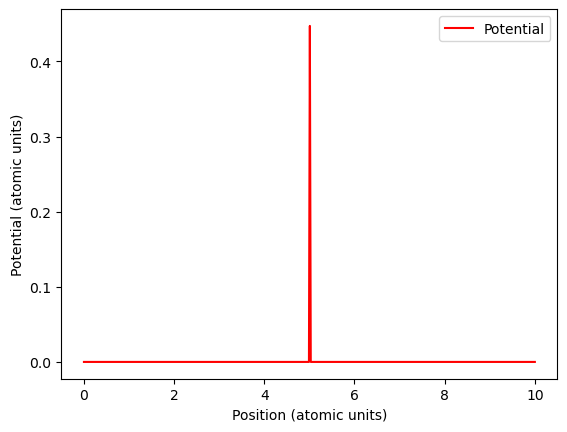

In [1]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

# create an array of x-values between 0 and 10
x = np.linspace(0, 10, 500)

# create the delta function potential.  Need to specify that it will be in the middle 
# of 500 samples along x.  We will scale this by the amplitude of the normalized energy 
# eigenstates so that this potential appears on the same scale as the eigenfunctions
V_x = signal.unit_impulse(500, idx='mid') * np.sqrt(2/10)

# now plot V_x against x
plt.plot(x, V_x, color='red', label="Potential")
plt.xlabel("Position (atomic units)")
plt.ylabel("Potential (atomic units)")
plt.legend()
plt.show()

# Approach
We can write the Hamiltonian for this system between $x=0$ and $x=10$ as follows:

$$\hat{H} = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + \delta(x-5), $$
and we notice that this looks very similar to the Hamiltonian we know from the ordinary particle in a box
except for the presence of this peculiar spikey potential right in the middle of the box.  We could try to find [the exact eigenfunctions for this Hamiltonian](https://arxiv.org/pdf/1001.0311.pdf), but we can also obtain insights and reasonably good results utilizing approximate methods, such as the [Variational Method](https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Quantum_Mechanics/17%3A_Quantum_Calculations/Variational_Method#:~:text=The%20Variational%20Method%20is%20a,the%20known%20and%20approximated%20energies) or [Perturbation Theory](https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Book%3A_Quantum_States_of_Atoms_and_Molecules_(Zielinksi_et_al)/09%3A_The_Electronic_States_of_the_Multielectron_Atoms/9.03%3A_Perturbation_Theory).  Here we will use the Variational Method.

#### Form of the trial wavefunction
In particular, we will optimize the trial wavefunction given by 
\begin{equation}
\Phi(x) = \sum_{n=1}^N c_n \psi_n(x)
\end{equation}
where the expansion coefficients $c_n$ are real numbers
and $\psi_n(x)$ are the energy eigenfunctions of the ordinary particle in a box that has no potential
between $x=0$ and $x=L$.  In particular, these eigenfunctions have the form
\begin{equation}
\psi_n(x) = \sqrt{\frac{2}{10} } {\rm sin}\left(\frac{n \pi x}{10} \right).
\end{equation}

#### Form of the energy functional of the trial wavefunction
We will seek to minimize the energy functional of the trial wavefunction through the expansion coefficients, where the
energy functional of the trial wavefunction can be written as
\begin{equation}
E_{trial} = \frac{\int_0^{10} \Phi^* (x) \: \hat{H} \: \Phi(x) dx }{\int_0^{10} \Phi^* (x) \: \Phi(x) dx },
\end{equation}
where we have recognized that the boundaries of the box are at $x=0$ and $x=10$, so our range of integration
goes between these boundaries.

#### Atomic Units
We will express our Hamiltonian in atomic units where $\hbar = 1$ and $m = 1$, so we can write the Hamiltonian in 
this unit system as:
\begin{equation}
\hat{H} = -\frac{1}{2} \frac{d^2}{dx^2} + \delta(x-5).
\end{equation}
We further note that the Hamiltonian can be written as a sum 
of kinetic and potential operators, $\hat{H} = \hat{T} + \hat{V}$
where $\hat{T} = -\frac{1}{2} \frac{d^2}{dx^2}$ and $\hat{V} = \delta(x-5)$.  For the ordinary particle in a box, the Hamiltonian only contains $\hat{T}$, so we can note that the particle in a box energy eigenfunctions obey the following eigenvalue equation with the kinetic energy operator (in atomic units)
\begin{equation}
\hat{T} \psi_n(x) = \frac{\pi^2 n^2}{200} \psi_n(x) \equiv E_n \psi_n(x).   
\end{equation}

#### Solving the Linear Variational Problem
The Linear Variational Method is carried out by minimizing $E_{trial}$ with respect to the expansion coefficients in $\Phi(x)$.  This leads
to the condition that the partial derivative of the trial energy with 
respect to each expansion coefficient is zero:
\begin{equation}
\frac{\partial}{\partial c_m} E_{trial} = 0 \; \; \forall \; m.
\end{equation}
When this is true, the trial energy and the expansion
coefficients satisfy the following equations:
\begin{equation}
E_{trial} c_m = \sum_{n=1}^N H_{nm} c_n,
\end{equation}
where 
\begin{equation}
H_{nm} = \int_0^{10} \psi^*_n(x) \hat{H} \psi_m(x) dx. 
\end{equation}
This can be written as an eigenvalue equation
\begin{equation}
{\bf H} {\bf c} = E_{trial} {\bf c},
\end{equation}
where ${\bf H}$ is the matrix whose elements are given by $H_{nm}$ and ${\bf c}$ is the vector of coefficients.




### Questions Part 1:

1. The matrix element $H_{nm}$ can be expressed as a sum of kinetic and potential matrix elements, $T_{nm} + V_{nm}$ where
\begin{equation}
T_{nm} = \int_0^{10} \psi^*_n(x) \hat{T} \psi_m(x) dx 
\end{equation}
and
\begin{equation}
V_{nm} = \int_0^{10} \psi^*_n(x) \hat{V} \psi_m(x) dx. 
\end{equation}
Write a general expression for the elements of $T_{nm}$ and $V_{nm}$
for our particle in a box with a delta potential.

2. Write two python functions `Kinetic_matrix_element(n, m)`, `Potential_matrix_element(n, m)` that take the indices $n$ and $m$ and return the corresponding value of $T_{nm}$ and $V_{nm}$.  Skeleton code for this function follows.  Three helper functions are provided: 
    - `def energy_eigenvalue(n, L, m)` that can provide the energy eigenvalues of the ordinary particle in a box for energy eigenstate $n$, length $L$, and mass $m$
    - `def energy_eigenfunction(n, L, x)` that can provide the value(s) of the energy eigenfunction of the ordinary particle in a box for energy eigenstate $n$ with length $L$ evaluated at x-value(s) $x$.
    - `def Hamiltonian_matrix_element(n, m)` that will call the `Kinetic_matrix_element` and `Potential_matrix_element` functions to return the total Hamiltonian matrix element value.


In [2]:
def energy_eigenvalue(n, L, m):
    """ Helper function to take the quantum number n of the particle in a box, the length 
        of the box L, and the mass of the particle m and return the energy eigenvalue in atomic units.
        Both the length and mass should be in atomic units.
        
    Arguments
    ---------
    n : int
        the quantum state of the particle in a box
        
    L : float
        the length of the box in atomic units
    m : float
        the mass of the particle in atomic units
    """
        
    return n ** 2 * np.pi ** 2 / ( 2 * m * L ** 2)

def energy_eigenfunction(n, L, x):
    """ Helper function to take the quantum number n of the particle in a box, the length 
        of the box L, and x-coordinate value(s) (single value or list) and return the corresponding
        energy eigenstate value(s) of the ordinary particle in a box
        
    Arguments
    ---------
    n : int
        the quantum state of the particle in a box      
    L : float
        the length of the box in atomic units
    x : float (or numpy array of floats)
        the position variable for the energy eigenstate in atomic units
    """
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)

def Hamiltonian_matrix_element(n, m):
    """ Helper function to take two indices (n, m) and return the Hamiltonian matrix element H_{n,m}, 
        which is <n|H|m> in Dirac's Bra-Ket notation.  This will call Kinetic_matrix_element(n, m) and
        Potential_matrix_element(n, m).
    
    Arguments
    ---------
    n : int
        the index corresponding to the bra state
    m : int
        the index corresponding to the ket state 
        
    Returns
    -------
    H_mn : float
         the matrix element corresponding to <n|H|m> = <n|T|m> + <n|V|m>
         
    Example
    -------
    >>> H_12 = Hamiltonian_matrix_element(1,2)
    >>> H_33 = Hamiltonian_matrix_element(3,3)
    
    Notes
    -----
    if n == m, you need to include kinetic and potential contributions of <n|H|n>.
    e.g. <n|H|n> = <n|T|n> + <n|V|n> = <n|E_n|n> + <n|V|n> = E_n<n|n> + <n|V|n> = E_n + <n|V|n>
    where E_n is the energy eigenvalue of the ordinary particle in a box state \psi_n(x)
    
    if n != m, you need to include only the potential contribution <n|V|m>.
    
    """
    H_nm = Kinetic_matrix_element(n, m) + Potential_matrix_element(n, m)
    return H_nm

def Kinetic_matrix_element(n, m):
    """ Function to take two indices (n, m) and return the Kinetic Energy matrix element T_{n,m}, 
        which is <n|T|m> in Dirac's Bra-Ket notation.  
    
    Arguments
    ---------
    n : int
        the index corresponding to the bra state
    m : int
        the index corresponding to the ket state 
        
    Returns
    -------
    T_mn : float
         the matrix element corresponding to <n|T|m> = E_m <n|m>
         
    Example
    -------
    >>> T_12 = Kinetic_matrix_element(1,2) -> 0
    >>> T_33 = Kinetic_matrix_element(3,3) -> E_3
    
    """
    ### replace with code
    pass

def Potential_matrix_element(n, m):
    """ Function to take two indices (n, m) and return the Hamiltonian matrix element V_{n,m}, 
        which is <n|V|m> in Dirac's Bra-Ket notation and V = \delta(x-5)
    
    Arguments
    ---------
    n : int
        the index corresponding to the bra state
    m : int
        the index corresponding to the ket state 
        
    Returns
    -------
    V_mn : float
         the matrix element corresponding to <n|V|m> = \psi_n(5) * psi_m(5)
         
    Example
    -------
    >>> V_12 = Potential_matrix_element(1,2)
    >>> V_33 = Potential_matrix_element(3,3)
    """
    ### replace with code
    pass

#### Variational optimization

Since we see that the linear Variational Method can be cast as an eigenvalue equation ${\bf H} {\bf c} = E {\bf c}$, 
we can find the Variational ground-state energy and wavefunction through the following steps:
- Build the matrix ${\bf H}$; we will do this in the basis of energy eigenfunctions of the ordinary particle in a box
- Diagonalize ${\bf H}$; the lowest eigenvalue will be the variational approximation to the ground-state energy and the corresponding eigenvector will represent the expansion coeefficients for the variational ground-state wavefunction in terms of the basis functions.

We can use `np.linalg.eigh()` to diagonalize the Hamiltonian matrix.

The following code block contains a helper function called `build_matrices(n_basis)` that will 
build and return the Hamiltonian, Kinetic Energy, and Potential Energy matrices defined above.  
The argument `n_basis` will be used to determine the number of basis functions, and the 
size of the resulsing matrices will be `n_basis x n_basis`.  

In [ ]:
def build_matrices(n_basis):
    """ Function that will build and return the Hamiltonian, Kinetic, and Potential energy matrices
    
    Arguments
    ---------
    n_basis : int
        the number of basis functions used to build the matrices
        
    Returns
    -------
    H : n_basis x n_basis array of floats
         the total Hamiltonian matrix
         
    T : n_basis x n_basis array of floats
         the kinetic energy matrix
         
    V : n_basis x n_basis array of floats
         the potential energy matrix 
         
    Example
    -------
    >>> H, T, V = build_matrices(3)
    """
    H = np.zeros((n_basis, n_basis))
    T = np.zeros((n_basis, n_basis))
    V = np.zeros((n_basis, n_basis))
    
    for i in range(n_basis):
        n = i + 1 # i starts from 0 but n should start at 1
        for j in range(n_basis):
            m = j + 1 # j starts at 0 but m should start at 1
            H[i, j] = Hamiltonian_matrix_element(n, m)
            T[i, j] = Kinetic_matrix_element(n, m)
            V[i, j] = Potential_matrix_element(n, m)
    return H, T, V


The following line calls our `build_matrices` function to build ${\bf H}$, ${\bf T}$, and ${\bf V}$ matrices.
We will call the array that stores ${\bf H}$ `Hamiltonian_matrix`. 

In [ ]:
n_basis = 3
Hamiltonian_matrix, Kinetic_matrix, Potential_matrix = build_matrices(n_basis)

The following lines will find the eigenvalues and eigenvectors of ${\bf H}$.  The lowest energy 
eigenvalue will be the variational estimate of the ground-state energy and the associated eigenvector
will be the variational estimate of the ground-state wavefunction.

In [ ]:
# compute eigenvalues and eigenvectors of Hamiltonian_matrix
# store eigenvalues to E_opt and eigenvectors to c_opt
E_opt, c_opt = np.linalg.eigh(Hamiltonian_matrix)

# print lowest eigenvalues corresponding to the 
# variational estimate of the ground state energy
print(F'The variational ground state energy with {n_basis} basis functions is {E_opt[0]:.6f} atomic units')


#### Visualizing the variational ground-state
Now that we have the variational eigenvectors (along with the eigenvalues), we can visualize the 
variational ground-state wavefunction by expanding it in terms of the basis functions $\psi_n(x)$ using
the expansion coefficients from the ground-state eigenvector:
$$ \Phi(x) = \sum_n c_n \psi_n(x). $$
The ground-state eigenvector can be accessed as a slice of `c_opt` as follows:
`c_opt[:,0]`

We will build a numpy array of values from this expansion and plot it using `pyplot`.

In [ ]:
# initialize a numpy array for Phi_gs as an array of zeros with the same length as the x-axis used in the first cell
Phi_gs = np.zeros_like(x)

# loop through the basis states and add c_n \psi_n(x) to Phi_gs 
for i in range(n_basis):
    n = i + 1
    Phi_gs += c_opt[i,0] * energy_eigenfunction(n, 10, x)
    
# now plot the variational ground state along with the ground-state of the ordinary PIB
plt.plot(x, Phi_gs ** 2, "blue", label="Variational ground-state Probability Density")
plt.plot(x, energy_eigenfunction(1, 10, x) ** 2, "red", label="PIB ground state Probability Density")
# optionally plot the delta potential
#plt.plot(x, V_x, "purple", label="Potential")
plt.legend()

### Questions Part 2:
1.  Is the energy you calculated above higher or lower than the ground state energy of the ordinary particle in a box system (that is, without the delta function potential)?
2.  Why do you think mixing in functions that correspond to excited states in the ordinary particle in a box system actually helped to improve (i.e. lower) your energy in the system with the delta function potential?
3.  Increase the number of basis functions to 50 (so that ${\bf H}$ is a 50x50 matrix and ${\bf c}$ is a vector with 50 entries) and repeat your calculation of the variational estimate of the ground state energy.  Does the energy improve (lower) compared to what it was when 3 basis functions were used?  Do you notice any difference in the plot of the variational estimate of the ground-state probability density?

### Behavior of Total Energy, Kinetic Energy, and Potential Energy functionals with basis set size.

Typically speaking, the quality of the variational ground-state energy improves with the basis set size.
Here we will look at the behavior of the total energy, the kinetic energy, and the potential energy of the 
trial wavefunction as a function of basis set size. 

For a given trial wavefunction (as determined by the variationally determined ground-state eigenvector ${\bf c}$,
we can define the total energy as
\begin{equation}
E = {\bf c}^t {\bf H} {\bf c} 
\end{equation}
the kinetic energy as 
\begin{equation}
T = {\bf c}^t {\bf T} {\bf c},
\end{equation}
and the potential energy as 
\begin{equation}
V = {\bf c}^t {\bf V} {\bf c}.
\end{equation}

where ${\bf c}^t$ is just the transpose of ${\bf c}$. We will perform this computation for 
basis set sizes spanning `n_basis = 2` to `n_basis = 202`, and we will compare to the 
ground state and first excited state of the ordinary particle in a box ($E_1$ and $E_2$).


In [ ]:
# define the number of basis functions
n_basis_list = []
E_list = []
T_list = []
V_list = []
E_1_list = []
E_2_list = []
for i in range(2,202, 2):
    n_basis_list.append(i)
    H, T, V = build_matrices(i)
    e_t, c_t = np.linalg.eigh(H)
    E_list.append(e_t[0])
    T_c = np.dot(T, c_t[:,0])
    T_list.append( np.dot( np.transpose(c_t[:,0]), T_c ) )
    V_c = np.dot(V, c_t[:,0])
    V_list.append( np.dot( np.transpose(c_t[:,0]), V_c ) )
    E_1_list.append(T[0,0])
    E_2_list.append(T[1,1])
    
    

    
    



In [ ]:
plt.plot(n_basis_list, E_list, label="E")
plt.plot(n_basis_list, T_list, label="T")
plt.plot(n_basis_list, V_list, label="V")
plt.plot(n_basis_list, E_1_list, label="E_1")
plt.plot(n_basis_list, E_2_list, label="E_2")
plt.legend()
